In [1]:
import pandas as pd
import calendar
import math
from math import ceil
pd.__version__

'1.0.3'

In [2]:
stores = pd.read_csv("../dataset/stores.csv")
features = pd.read_csv("../dataset/features.csv")
train = pd.read_csv("../dataset/train.csv")
merged = pd.read_csv("../dataset/train_merged_cleaned.csv")
dataset = merged

In [4]:
dataset['CPI'].max()
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


In [5]:
store_wise_dataset = {}
for store_id in range(dataset['Store'].min(), dataset['Store'].max()+1):
    store_wise_dataset[store_id] = dataset[dataset['Store'] == store_id]

In [6]:
selected_store_dataset = store_wise_dataset[1]
# selected_store_dataset.head()
selected_store_dept_dataset = selected_store_dataset[selected_store_dataset['Dept'] == 1]
selected_store_dept_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


# Weekly Sales

In [7]:
selected_store_dataset = store_wise_dataset[1]
selected_store_dept_dataset = selected_store_dataset[selected_store_dataset['Dept'] == 1]

def date_formatter(single_row, date_type):
    year, month, day = single_row['Date'].split('-')

    if date_type == 'y':
        return year
    if date_type == 'm':
        return int(month)
    if date_type == 'd':
        return int(day)

selected_store_dept_dataset['year_month_week'] = selected_store_dept_dataset.apply(lambda row: (date_formatter(row, 'y'), calendar.month_abbr[date_formatter(row, 'm')], str(ceil(date_formatter(row, 'd')/7.0))), axis=1)

selected_store_dept_dataset


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year_month_week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,"(2010, Feb, 1)"
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,"(2010, Feb, 2)"
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,"(2010, Feb, 3)"
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,"(2010, Feb, 4)"
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,"(2010, Mar, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,False,A,151315,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,222.981658,6.908,"(2012, Sep, 4)"
139,1,1,2012-10-05,21904.47,False,A,151315,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,223.181477,6.573,"(2012, Oct, 1)"
140,1,1,2012-10-12,22764.01,False,A,151315,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,223.381296,6.573,"(2012, Oct, 2)"
141,1,1,2012-10-19,24185.27,False,A,151315,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,223.425723,6.573,"(2012, Oct, 3)"


In [8]:
selected_store_dept_sales_on_holiday_dataset = selected_store_dept_dataset.filter(['Date','Weekly_Sales', 'IsHoliday'], axis=1)
selected_store_dept_sales_on_holiday_dataset = selected_store_dept_sales_on_holiday_dataset[selected_store_dept_sales_on_holiday_dataset['IsHoliday'] == True]
selected_store_dept_sales_on_holiday_dataset.head()

,Date,Weekly_Sales,IsHoliday
1,2010-02-12,46039.49,True
31,2010-09-10,18194.74,True
42,2010-11-26,18820.29,True
47,2010-12-31,19124.58,True
53,2011-02-11,37887.17,True


In [10]:
from bokeh.io import output_file, show
from bokeh.models import Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange, Range1d, LinearAxis
from bokeh.plotting import figure
import math
    
plot_data = ColumnDataSource(
        data=dict(
            date=selected_store_dept_dataset.year_month_week.tolist(),
            weekly_sales=selected_store_dept_dataset.Weekly_Sales.tolist(),
            is_holiday=selected_store_dept_dataset.IsHoliday.tolist(),
            cpi=selected_store_dept_dataset.CPI.tolist()
        )
    )

circle_data = ColumnDataSource(
        data=dict(
            date=selected_store_dept_sales_on_holiday_dataset.Date.tolist(),
            weekly_sales=selected_store_dept_sales_on_holiday_dataset.Weekly_Sales.tolist(),
            is_holiday=selected_store_dept_sales_on_holiday_dataset.IsHoliday.tolist()
        )
    )

weekly_sales_figure = figure(
    title="Weekly Sales",
    x_range=FactorRange(*selected_store_dept_dataset.year_month_week.tolist()),
    plot_width=1400,
    plot_height=400)
weekly_sales_figure.yaxis.axis_label = 'Sales in USD'

weekly_sales_figure.extra_y_ranges['CPI'] = Range1d(start=0, end=300)
weekly_sales_figure.add_layout(LinearAxis(y_range_name='CPI', axis_label='CPI'), 'right')

weekly_sales_line_plot = weekly_sales_figure.line(
    source=plot_data,
    x='date',
    y='weekly_sales',
    legend = 'Sales in USD',
    line_width=2, color="red")

weekly_cpi_line_plot = weekly_sales_figure.line(
    source=plot_data,
    x='date',
    y='cpi',
    legend = 'CPI',
    y_range_name = 'CPI',
    line_width=2, color="green")

weekly_sales_figure.circle(
    source=circle_data,
    x='date',
    y='weekly_sales',
    size=15, color="green", alpha=0.5)

# Adding hover tool
weekly_sales_hover = HoverTool(
    tooltips=[
        ('Holiday', '@is_holiday'),
        ('Sales', '@weekly_sales'),
        ('CPI', '@cpi')],
    mode='vline')
weekly_sales_figure.add_tools(weekly_sales_hover)

# weekly_sales_figure.xaxis.major_label_orientation = 1
weekly_sales_figure.xgrid.grid_line_color = None
# weekly_sales_figure.xaxis.major_label_orientation = math.pi / 2

show(weekly_sales_figure)

# Monthly Avg Sales

In [23]:
selected_store_dataset = store_wise_dataset[1]
selected_store_dept_dataset = selected_store_dataset[selected_store_dataset['Dept'] == 1]
selected_store_dept_dataset.head()

selected_store_dept_avg_monthly_dataset = selected_store_dept_dataset
selected_store_dept_avg_monthly_dataset['Date'] = pd.to_datetime(selected_store_dept_avg_monthly_dataset['Date'])
selected_store_dept_avg_monthly_dataset.index = pd.DatetimeIndex(selected_store_dept_avg_monthly_dataset['Date'])
selected_store_dept_avg_monthly_dataset

selected_store_dept_avg_monthly_dataset = selected_store_dept_avg_monthly_dataset.groupby(pd.Grouper(freq="M")).agg(
    Store=('Store', 'first'),
    Dept=('Dept', 'first'),
    Avg_Monthly_Sales=('Weekly_Sales', 'mean'),
    Type=('Type', 'first'),
    Size=('Size', 'first'),
    Avg_Temperature=('Temperature', 'mean'),
    Avg_Fuel_Price=('Fuel_Price', 'mean'),
    Unemployment=('Unemployment', 'first'),
    Avg_CPI=('CPI', 'mean')
)
selected_store_dept_avg_monthly_dataset.reset_index(level=0, inplace=True)
selected_store_dept_avg_monthly_dataset['Date'] = selected_store_dept_avg_monthly_dataset['Date'].dt.strftime('%Y-%m')

def date_formatter(single_row, date_type):
    year, month = single_row['Date'].split('-')

    if date_type == 'y':
        return year
    if date_type == 'm':
        return int(month)

selected_store_dept_avg_monthly_dataset['year_month'] = selected_store_dept_avg_monthly_dataset.apply(lambda row: (date_formatter(row, 'y'), calendar.month_abbr[date_formatter(row, 'm')]), axis=1)

selected_store_dept_avg_monthly_dataset.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Store,Dept,Avg_Monthly_Sales,Type,Size,Avg_Temperature,Avg_Fuel_Price,Unemployment,Avg_CPI,year_month
0,2010-02,1,1,32990.7700,A,151315,41.8450,2.54875,8.106,211.236828,"(2010, Feb)"
1,2010-03,1,1,22809.2850,A,151315,52.5800,2.68600,8.106,211.241116,"(2010, Mar)"
2,2010-04,1,1,30103.3520,A,151315,65.3400,2.77440,7.808,210.552135,"(2010, Apr)"
3,2010-05,1,1,16673.5375,A,151315,76.0525,2.81850,7.808,210.547812,"(2010, May)"
4,2010-06,1,1,16685.1750,A,151315,82.3925,2.66575,7.808,211.356237,"(2010, Jun)"


In [104]:
from bokeh.io import output_file, show
from bokeh.models import Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange
from bokeh.plotting import figure
import math
    
monthly_plot_data = ColumnDataSource(
        data=dict(
            year_month=selected_store_dept_avg_monthly_dataset.year_month.tolist(),
            monthly_avg_sales=selected_store_dept_avg_monthly_dataset.Avg_Monthly_Sales.tolist()
        )
    )

monthly_sales_figure = figure(
    title="Monthly Avg Sales",
    x_range=FactorRange(*selected_store_dept_avg_monthly_dataset.year_month.tolist()),
    plot_width=1400,
    plot_height=400)

monthly_sales_line_plot = monthly_sales_figure.line(
    source=monthly_plot_data,
    x='year_month',
    y='monthly_avg_sales',
    line_width=2, color="red")

# Adding hover tool
monthly_sales_hover = HoverTool(
    tooltips=[
        ('Avg Sales', '@monthly_avg_sales')],
    mode='vline')
monthly_sales_figure.add_tools(monthly_sales_hover)

show(monthly_sales_figure)

# Quarterly Sales

In [25]:
selected_store_dataset = store_wise_dataset[1]
selected_store_dept_dataset = selected_store_dataset[selected_store_dataset['Dept'] == 1]
selected_store_dept_dataset.head()

selected_store_dept_avg_quarterly_dataset = selected_store_dept_dataset
selected_store_dept_avg_quarterly_dataset['Date'] = pd.to_datetime(selected_store_dept_avg_quarterly_dataset['Date'])
selected_store_dept_avg_quarterly_dataset.index = pd.DatetimeIndex(selected_store_dept_avg_quarterly_dataset['Date'])

selected_store_dept_avg_quarterly_dataset = selected_store_dept_avg_quarterly_dataset.groupby(pd.Grouper(freq="Q")).agg(
    Store=('Store', 'first'),
    Dept=('Dept', 'first'),
    Avg_Quarterly_Sales=('Weekly_Sales', 'mean'),
    Type=('Type', 'first'),
    Size=('Size', 'first')
)
selected_store_dept_avg_quarterly_dataset.reset_index(level=0, inplace=True)
selected_store_dept_avg_quarterly_dataset['Date'] = selected_store_dept_avg_quarterly_dataset['Date'].dt.strftime('%Y-%m')
# selected_store_dept_avg_quarterly_dataset

def date_formatter(single_row, date_type):
    year, month = single_row['Date'].split('-')

    if date_type == 'y':
        return year
    if date_type == 'm':
        return int(month)
    if date_type == 'q':
        return "Q" + str(math.ceil(int(month) / 3.0))

selected_store_dept_avg_quarterly_dataset['year_quarter'] = selected_store_dept_avg_quarterly_dataset.apply(lambda row: (date_formatter(row, 'y'), date_formatter(row, 'q')), axis=1)

selected_store_dept_avg_quarterly_dataset.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Store,Dept,Avg_Quarterly_Sales,Type,Size,year_quarter
0,2010-03,1,1,27900.027500,A,151315,"(2010, Q1)"
1,2010-06,1,1,21842.431538,A,151315,"(2010, Q2)"
2,2010-09,1,1,16800.545385,A,151315,"(2010, Q3)"
3,2010-12,1,1,28627.843571,A,151315,"(2010, Q4)"
4,2011-03,1,1,23144.380000,A,151315,"(2011, Q1)"


In [26]:
from bokeh.io import output_file, show
from bokeh.models import Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange
from bokeh.plotting import figure
import math
    
quarterly_plot_data = ColumnDataSource(
        data=dict(
            year_quarter=selected_store_dept_avg_quarterly_dataset.year_quarter.tolist(),
            quarterly_avg_sales=selected_store_dept_avg_quarterly_dataset.Avg_Quarterly_Sales.tolist()
        )
    )

quarterly_sales_figure = figure(
    title="Quarterly Avg Sales",
    x_range=FactorRange(*selected_store_dept_avg_quarterly_dataset.year_quarter.tolist()),
    plot_width=1400,
    plot_height=400)

quarterly_sales_line_plot = quarterly_sales_figure.line(
    source=quarterly_plot_data,
    x='year_quarter',
    y='quarterly_avg_sales',
    line_width=2, color="red")

# Adding hover tool
quarterly_sales_hover = HoverTool(
    tooltips=[
        ('Avg Sales', '@quarterly_avg_sales')],
    mode='vline')
quarterly_sales_figure.add_tools(quarterly_sales_hover)

show(quarterly_sales_figure)

# Scatter Plot - Temperature

In [10]:
selected_store_dataset = selected_store_dataset.sort_values('Temperature')
selected_store_dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
3594,1,27,2011-01-14,1606.24,False,A,151315,35.4,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742
192,1,2,2011-01-14,39857.40,False,A,151315,35.4,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742
10113,1,98,2011-01-14,10914.54,False,A,151315,35.4,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742
6838,1,56,2011-01-14,291.72,False,A,151315,35.4,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742
3737,1,28,2011-01-14,781.19,False,A,151315,35.4,2.983,0.0,0.0,0.0,0.0,0.0,211.457411,7.742


In [7]:
selected_store_avg_sales_by_temp = selected_store_dataset.groupby("Temperature").agg(
    Store=('Store', 'first'),
    Avg_Sales=('Weekly_Sales', 'mean')
)
selected_store_avg_sales_by_temp.reset_index(level=0, inplace=True)
selected_store_avg_sales_by_temp.head()

,Temperature,Store,Avg_Sales
0,35.40,1,19591.745915
1,36.39,1,22911.318472
2,38.51,1,22804.964444
3,39.93,1,22081.755753
4,42.27,1,22628.585634


In [122]:
from bokeh.io import output_file, show
from bokeh.models import ColorBar, Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange, Range1d, LinearAxis, SingleIntervalTicker, FixedTicker
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
import math

x_range_start = 10 * round(selected_store_avg_sales_by_temp.Temperature.tolist()[0]//10)
x_range_end = 10 * (round(selected_store_avg_sales_by_temp.Temperature.tolist()[-1]/10) + 1)

scatter_data_dict = dict(
            temp=selected_store_avg_sales_by_temp.Temperature.tolist(),
            avg_sales=selected_store_avg_sales_by_temp.Avg_Sales.tolist()
        )
circle_data = ColumnDataSource(
        data=scatter_data_dict
    )

# mapper = linear_cmap(field_name='temp', palette=Spectral6 ,low=selected_store_avg_sales_by_temp.Temperature.tolist()[0] ,high=selected_store_avg_sales_by_temp.Temperature.tolist()[-1])

temp_scatter_plot_figure = figure(
    title="Scatter Plot",
    x_range=Range1d(start=x_range_start, end=x_range_end),
    plot_width=1400,
    plot_height=400
)
temp_scatter_plot_figure.xaxis.axis_label = 'Temperature in F'
temp_scatter_plot_figure.yaxis.axis_label = 'Sales in USD'

temp_scatter_plot_figure.circle(
    source=circle_data,
    x='temp',
    y='avg_sales',
    size=15, color="green", alpha=0.5)

# Adding hover tool
temp_scatter_hover = HoverTool(
    tooltips=[
        ('Sales', '$' + '@avg_sales{int}'),
        ('Temperature', '@temp')],
    mode='vline')
temp_scatter_plot_figure.add_tools(temp_scatter_hover)

# weekly_sales_figure.xaxis.major_label_orientation = 1
temp_scatter_plot_figure.xgrid.grid_line_color = None
# temp_scatter_plot_figure.xaxis.major_label_orientation = math.pi / 2

show(temp_scatter_plot_figure)

# Store Area Trend

In [7]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [138]:
store_total_sales = dataset.groupby("Store").agg(
    Total_Sales=('Weekly_Sales', 'mean'),
    Size=('Size', 'first')
)
store_total_sales.reset_index(level=0, inplace=True)
store_total_sales['Size'] = store_total_sales['Size'].astype(str)
# store_total_sales


In [157]:
x_range_factors = []
for store, size in zip(store_total_sales.Store.tolist(),store_total_sales.Size.tolist()):
    x_range_factors.append((size, str(store)))
    
x_range_factors

[('151315', '1'),
 ('202307', '2'),
 ('37392', '3'),
 ('205863', '4'),
 ('34875', '5'),
 ('202505', '6'),
 ('70713', '7'),
 ('155078', '8'),
 ('125833', '9'),
 ('126512', '10'),
 ('207499', '11'),
 ('112238', '12'),
 ('219622', '13'),
 ('200898', '14'),
 ('123737', '15'),
 ('57197', '16'),
 ('93188', '17'),
 ('120653', '18'),
 ('203819', '19'),
 ('203742', '20'),
 ('140167', '21'),
 ('119557', '22'),
 ('114533', '23'),
 ('203819', '24'),
 ('128107', '25'),
 ('152513', '26'),
 ('204184', '27'),
 ('206302', '28'),
 ('93638', '29'),
 ('42988', '30'),
 ('203750', '31'),
 ('203007', '32'),
 ('39690', '33'),
 ('158114', '34'),
 ('103681', '35'),
 ('39910', '36'),
 ('39910', '37'),
 ('39690', '38'),
 ('184109', '39'),
 ('155083', '40'),
 ('196321', '41'),
 ('39690', '42'),
 ('41062', '43'),
 ('39910', '44'),
 ('118221', '45')]

In [90]:
# store_total_sales
# store_total_sales['Size'].max()
# sorted(set(store_total_sales['Size']))
# Overlapping Stores
# 19, 24
# 42, 33, 38
# 44, 37, 36

In [139]:
# i = store_total_sales[(store_total_sales.Store == 37)].index
# store_total_sales.drop(i)
# store_total_sales.drop(store_total_sales[(store_total_sales.Store == '42')].index)
# store_total_sales[(store_total_sales.Store == 37)].index
store_total_sales_trimmed = store_total_sales[(store_total_sales.Store != 36) &
                                      (store_total_sales.Store != 37) &
                                      (store_total_sales.Store != 44) &
                                      (store_total_sales.Store != 33) &
                                      (store_total_sales.Store != 38) &
                                      (store_total_sales.Store != 42) &
                                      (store_total_sales.Store != 19) &
                                      (store_total_sales.Store != 24)]
# store_total_sales_trimmed = store_total_sales[(store_total_sales.Store != 36) &
#                                       (store_total_sales.Store != 44) &
#                                       (store_total_sales.Store != 33) &
#                                       (store_total_sales.Store != 38)]

# Experimental Bar Plot

In [162]:
from bokeh.io import output_file, show
from bokeh.models import ColorBar, Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange, Range1d, LinearAxis, SingleIntervalTicker, FixedTicker
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import dodge
import math

# store_size_data_dict = dict(
#             store=store_total_sales.Store.tolist(),
#             total_sales=store_total_sales.Total_Sales.tolist(),
#             size=store_total_sales.Size.tolist()
#         )

store_size_data_dict = dict(
            x_range_factors=x_range_factors,
            store=store_total_sales.Store.tolist(),
            total_sales=store_total_sales.Total_Sales.tolist(),
            size=store_total_sales.Size.tolist()
        )

store_size_trend_figure.xaxis.axis_label = 'Store Size'
store_size_trend_figure.yaxis.axis_label = 'Total Sales in USD'

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=store_size_data_dict),
    x='x_range_factors', width=0.6, bottom=0,
    top='total_sales', color="green")

# Adding hover tool
store_size_trend_hover = HoverTool(
    tooltips=[
        ('Total Sales', '$' + '@total_sales{int}'),
        ('Store', '@store')],
    mode='vline')
store_size_trend_figure.add_tools(store_size_trend_hover)

store_size_trend_figure.x_range.range_padding = 0.05
store_size_trend_figure.xgrid.grid_line_color = None
# store_size_trend_figure.xaxis.major_label_orientation = "vertical"

show(store_size_trend_figure)


# Working Bar Plot

In [170]:
from bokeh.io import output_file, show
from bokeh.models import ColorBar, Panel, Div, Select, ColumnDataSource, HoverTool, FactorRange, Range1d, LinearAxis, SingleIntervalTicker, FixedTicker, LabelSet
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import dodge
import math

# store_size_data_dict = dict(
#             store=store_total_sales.Store.tolist(),
#             total_sales=store_total_sales.Total_Sales.tolist(),
#             size=store_total_sales.Size.tolist()
#         )

store_size_data_dict = dict(
            store=store_total_sales_trimmed.Store.tolist(),
            total_sales=store_total_sales_trimmed.Total_Sales.tolist(),
            size=store_total_sales_trimmed.Size.tolist()
        )

pair_left_dict = dict(
    store=['24'],
    total_sales=['18969.106500'],
    size=['203819']
)

pair_right_dict = dict(
    store=['19'],
    total_sales=['20362.126734'],
    size=['203819']
)

tuple_center_dict = dict(
    store=['37', '42'],
    total_sales=['10297.355026', '11443.370118'],
    size=['39910', '39690']
)

tuple_left_dict = dict(
    store=['36', '38'],
    total_sales=['8584.412563', '7492.478460'],
    size=['39910', '39690']
)

tuple_right_dict = dict(
    store=['44', '33'],
    total_sales=['6038.929814', '5728.414053'],
    size=['39910', '39690']
)

store_size_trend_figure = figure(
    title="Store Size v/s Total Sales",
    x_range=FactorRange(*sorted(set(store_total_sales['Size']), reverse=True)),
    plot_width=1400,
    plot_height=400
)

store_size_trend_figure.xaxis.axis_label = 'Store Size'
store_size_trend_figure.yaxis.axis_label = 'Total Sales in USD'

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=store_size_data_dict),
    x=dodge('size', 0.0, range=store_size_trend_figure.x_range), width=0.4, bottom=0,
    top='total_sales', color="green")

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=tuple_center_dict),
    x=dodge('size', 0.0, range=store_size_trend_figure.x_range), width=0.2, bottom=0,
    top='total_sales', color="green")

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=tuple_left_dict),
    x=dodge('size', -0.3, range=store_size_trend_figure.x_range), width=0.2, bottom=0,
    top='total_sales', color="blue")

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=tuple_right_dict),
    x=dodge('size', 0.3, range=store_size_trend_figure.x_range), width=0.2, bottom=0,
    top='total_sales', color="red")

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=pair_left_dict),
    x=dodge('size', -0.2, range=store_size_trend_figure.x_range), width=0.3, bottom=0,
    top='total_sales', color="blue")

store_size_trend_figure.vbar(
    source=ColumnDataSource(data=pair_right_dict),
    x=dodge('size', 0.2, range=store_size_trend_figure.x_range), width=0.3, bottom=0,
    top='total_sales', color="red")

labels = LabelSet(source=ColumnDataSource(data=store_size_data_dict), x='size', y='total_sales', text='store', 
                  level='glyph', x_offset=-5, y_offset=2, render_mode='canvas', text_font_size="8pt")

# Adding hover tool
store_size_trend_hover = HoverTool(
    tooltips=[
        ('Total Sales', '$' + '@total_sales{int}'),
        ('Store', '@store')],
    mode='vline')
store_size_trend_figure.add_tools(store_size_trend_hover)

store_size_trend_figure.x_range.range_padding = 0.05
store_size_trend_figure.xgrid.grid_line_color = None
store_size_trend_figure.xaxis.major_label_orientation = math.pi / 2

store_size_trend_figure.add_layout(labels)

show(store_size_trend_figure)


In [ ]:
# store_size_trend_figure.vbar(
#     source=yellow_dict,
#     x='size', width=0.5, bottom=0,
#     top='total_sales', color="yellow")

# store_size_trend_figure.vbar(
#     source=red_dict,
#     x='size', width=0.5, bottom=0,
#     top='total_sales', color="red")

# store_size_trend_figure.vbar(
#     x=['39690'], width=0.5, bottom=0,
#     top=['37160222'], color="red")

# store_size_trend_figure.scatter(
#     source=vbar_data,
#     x='size', 
#     y='total_sales', color="firebrick")

In [54]:
test[(test['Store']==5) & (test['Dept']==99)]

NameError: name 'test' is not defined

# Data merging, cleaning

Merging the stores data with train data

In [21]:
train = pd.merge(train, stores, how='left', on='Store')

In [22]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

Merging features data with new train data

In [23]:
train = pd.merge(train, features, how='left', on=['Store', 'Date', 'IsHoliday'])
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [34]:
train.isna().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Type            False
Size            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
dtype: bool

Markdown related columns have NA values. Let's replace them with 0 values (no markdown)

In [33]:
train = train.fillna(0)

Confirming if all the NA values are gone

In [35]:
train_na = train[train.isnull().any(axis=1)]
train_na

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment


In [36]:
train.to_csv("train_merged_cleaned.csv", index=False)

# EDA

### Let's check the total weekly sales first

Let's aggregate by time to analyze time series data.

In [40]:
train_by_date = train.groupby('Date').agg(
    total_sales=('Weekly_Sales', sum),
    IsHoliday=('IsHoliday', 'first')
)
train_by_date

,total_sales,IsHoliday
Date,,
2010-02-05,49750740.50,False
2010-02-12,48336677.63,True
2010-02-19,48276993.78,False
2010-02-26,43968571.13,False
2010-03-05,46871470.30,False
...,...,...
2012-09-28,43734899.40,False
2012-10-05,47566639.31,False
2012-10-12,46128514.25,False


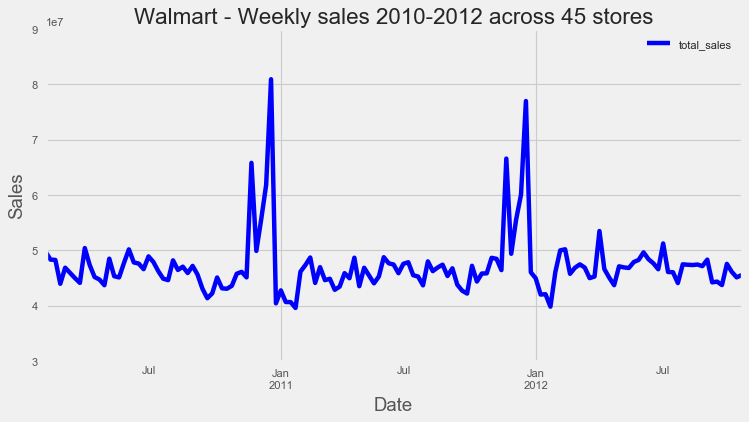

In [71]:
plt.style.use('fivethirtyeight')
ax = train_by_date.plot(color='blue', figsize=(10,5))
ax.set_ylabel('Sales')
ax.set_title('Walmart - Weekly sales 2010-2012 across 45 stores')
plt.show()

There is a very high spike during November, December because of the holiday season.

2012 seems to have higher sales and spikes.

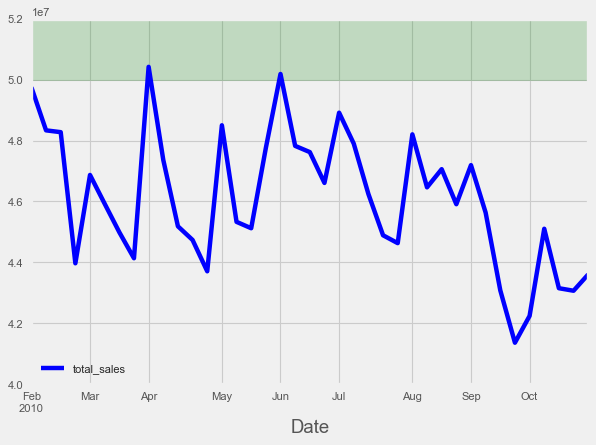

In [100]:
train_subset_10 = train_by_date['2010-01':'2010-10']
ax_10 = train_subset_10.plot(color='blue')
ax_10.axhspan(50000000, 52000000, color='green', alpha=0.2)
plt.show()

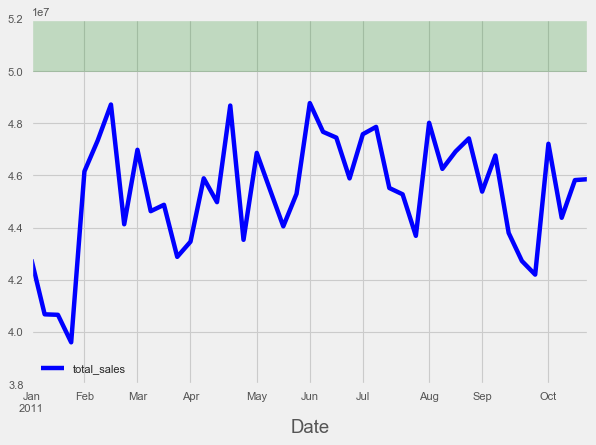

In [96]:
train_subset = train_by_date['2011-01':'2011-10']
ax = train_subset.plot(color='blue')
ax.axhspan(50000000, 52000000, color='green', alpha=0.2)
plt.show()

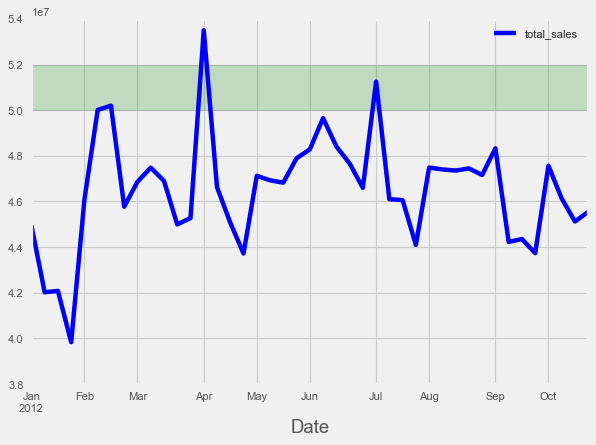

In [98]:
train_subset = train_by_date['2012-01':'2012-10']
ax = train_subset.plot(color='blue')
ax.axhspan(50000000, 52000000, color='green', alpha=0.2)
plt.show()

There are spikes in sales towards the starting of the months and then sales go down towards the end of month. this might indicate that people start shopping as soon as they get their salaries.

### Let's check the average weekly sales now

In [102]:
train_by_date_mean = train.groupby('Date').agg(
    total_sales=('Weekly_Sales', 'mean'),
    IsHoliday=('IsHoliday', 'first')
)
train_by_date_mean

,total_sales,IsHoliday
Date,,
2010-02-05,16836.121997,False
2010-02-12,16352.056032,True
2010-02-19,16216.658979,False
2010-02-26,14899.549688,False
2010-03-05,15921.015727,False
...,...,...
2012-09-28,14765.327279,False
2012-10-05,15983.413747,False
2012-10-12,15427.596739,False


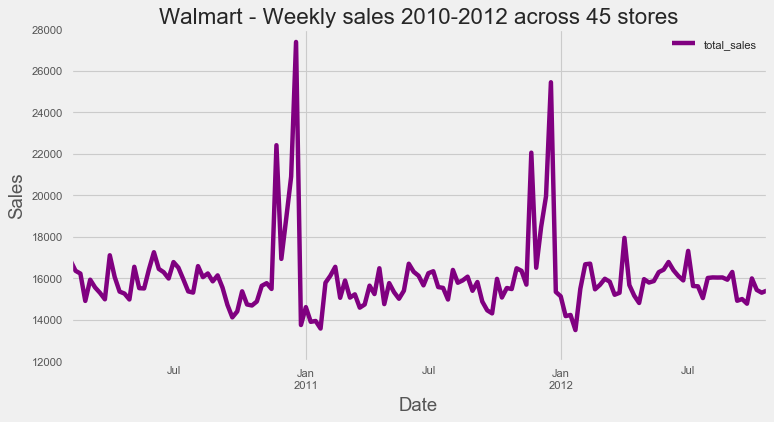

In [110]:
plt.style.use('fivethirtyeight')
ax = train_by_date_mean.plot(color='purple', figsize=(10,5))
ax.set_ylabel('Sales')
ax.set_title('Walmart - Weekly sales 2010-2012 across 45 stores')
plt.show()

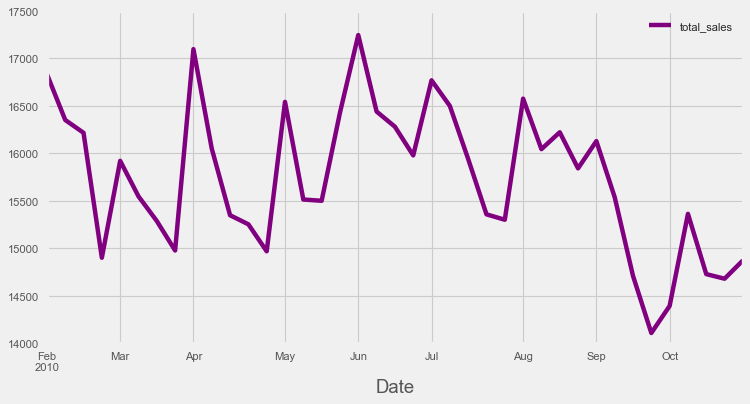

In [115]:
train_subset_10 = train_by_date_mean['2010-01':'2010-10']
ax_10 = train_subset_10.plot(color='purple', figsize=(10,5))
# ax_10.axhspan(50000000, 52000000, color='green', alpha=0.2)
plt.show()

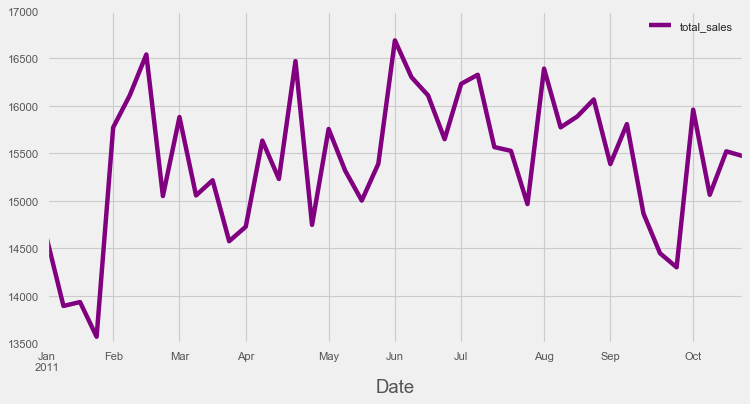

In [118]:
train_subset_11 = train_by_date_mean['2011-01':'2011-10']
ax_11 = train_subset_11.plot(color='purple', figsize=(10,5))
# ax_10.axhspan(50000000, 52000000, color='green', alpha=0.2)
plt.show()

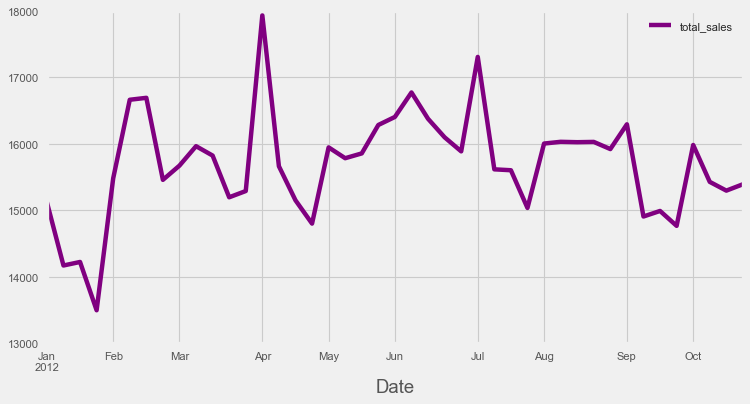

In [122]:
train_subset_12 = train_by_date_mean['2012-01':'2012-10']
ax_12 = train_subset_12.plot(color='purple', figsize=(10,5))
plt.show()

#### Now let's check the monthly average sales

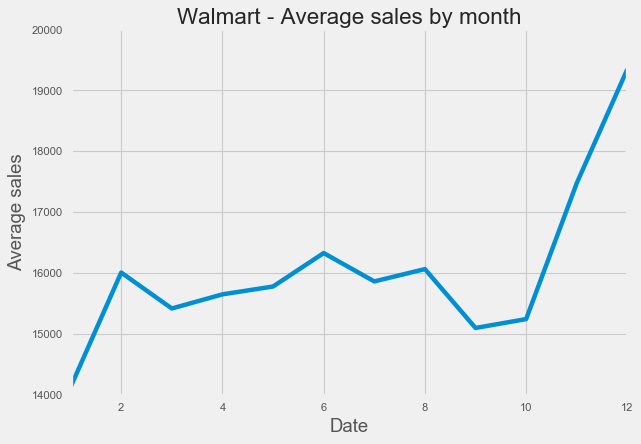

In [125]:
index_month = train_by_date_mean.index.month
average_sales_by_month = train_by_date_mean.groupby(index_month).mean()
ax = average_sales_by_month['total_sales'].plot()
ax.set_ylabel('Average sales')
ax.set_title('Walmart - Average sales by month')
plt.show()

### New features

In [141]:
train['year'] = pd.DatetimeIndex(train['Date']).year
test['year'] = pd.DatetimeIndex(test['Date']).year

train['month'] = pd.DatetimeIndex(train['Date']).month
test['month'] = pd.DatetimeIndex(test['Date']).month

train['week'] = pd.DatetimeIndex(train['Date']).week
test['week'] = pd.DatetimeIndex(test['Date']).week

In [142]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,39
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2012,10,40
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2012,10,41
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2012,10,42
